In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import *
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('df_new.csv')

In [3]:
df.head()

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2004,2005,2006,2007,2008,2009,summa,max_diff,rel_summa,rel_max_diff
0,как,47.047624,50.485318,51.249606,51.324196,51.174535,50.690452,43.827938,46.661967,43.969615,...,42.694196,42.500982,43.109769,42.680030,43.139763,42.728090,247411509.0,1358855.0,3818.433795,6.862513
1,для,39.036406,39.355981,36.372634,35.476594,34.023851,33.740838,37.896171,34.679782,37.146528,...,30.621972,30.345128,30.883207,30.777979,29.839784,29.342707,224808916.0,949912.0,3299.256128,4.312338
2,который,57.506854,58.760933,48.914409,49.913671,45.856711,43.924041,41.801180,40.520746,37.656026,...,35.218698,35.102393,35.800814,35.790432,35.352373,35.406858,205673046.0,1095121.0,3207.133563,9.846525
3,или,24.556165,25.115971,23.030987,20.249053,19.808623,20.124200,23.478078,20.004466,20.104439,...,18.616064,17.760823,19.057366,18.700423,19.169327,20.437974,105426662.0,535503.0,1631.491025,5.029258
4,год,18.330851,15.306693,15.909211,14.357555,14.889439,15.255392,17.956783,17.783390,16.347415,...,20.625414,20.784922,21.194543,21.730999,21.910810,21.658590,100948572.0,692196.0,1454.257712,3.444267


In [6]:
indexes = list(df[(df.rel_summa > 100) & (df.rel_summa < 477)].sort_values('rel_max_diff', ascending=False).index)

In [7]:
i = iter(range(0, 100))

8 крестьянин


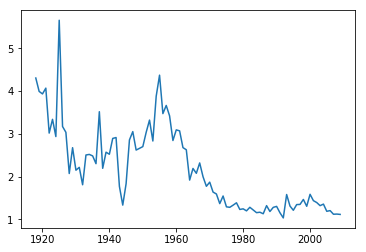

In [43]:
no = next(i)
n = indexes[no]
plt.plot(df.iloc[n,1:-4].index.map(int), list(df.iloc[n, 1:-4]))
print (no, df.iloc[n]['unigram'])

In [44]:
df.iloc[n, 1:-4].sort_values(ascending=False)[:10]

1925    5.65769
1955    4.37265
1918    4.30566
1921     4.0691
1919    3.99235
1920    3.93383
1954    3.88092
1957     3.6641
1937    3.51755
1956    3.47295
Name: 71, dtype: object

In [45]:
df.iloc[n, 1:-4].diff().apply(abs).sort_values(ascending=False)[:10]

1925    2.721676
1926    2.486129
1938    1.324273
1937    1.215955
1943    1.143215
1922    1.051553
1954    1.048745
1946    1.024594
1928    0.963845
1956    0.899703
Name: 71, dtype: float64

крестьянин


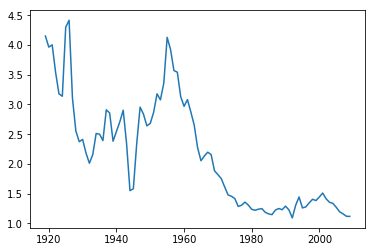

In [52]:
window = 2
plt.plot(df.iloc[n,1:-4].index.map(int), list(df.iloc[n, 1:-4].rolling(window).mean())) #.sort_values(ascending=False)
print (df.iloc[n]['unigram'])

In [53]:
df.iloc[n, 1:-4].diff().rolling(window).mean().apply(abs).sort_values(ascending=False)[:10]

1927    1.311204
1925    1.159362
1944    0.790525
1955    0.770238
1946    0.762317
1947    0.609652
1943    0.561162
1928    0.550062
1937    0.517003
1939    0.473683
Name: 71, dtype: float64

In [530]:
messages = 80000
data = df.iloc[:messages, 1:-4].fillna(0) #.diff().rolling(2).mean().fillna(0)
#data2 = data2.fillna(0)

In [1017]:
def cluster(data, k=300):
    pipeline = Pipeline([
        #('vect', CountVectorizer(max_df=0.3, min_df=0.0001, ngram_range=(1, 1), analyzer='word')),
        #('tfidf', TfidfTransformer()),
        #('svd', TruncatedSVD(n_components=)),
        #('norm', Normalizer() ),
        ('clust', KMeans(n_clusters=k))
    ])
    pipeline.fit(data)
    clust_labels = pipeline.named_steps['clust'].labels_
    return clust_labels

In [928]:
clust_labels = cluster(data. k=300)

Pipeline(memory=None,
     steps=[('clust', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=300, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [992]:
df_copy.to_csv('three_hundred_clusters.csv', index=False)

In [932]:
len(clust_labels)

80000

In [933]:
df_copy = df[:messages]
df_copy['clusters'] = clust_labels

/home/marina/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [936]:
df_copy.clusters.value_counts()[15:50]

224    97
256    89
146    72
218    60
78     50
8      50
278    49
203    45
64     45
168    43
150    39
131    33
190    26
293    24
75     24
250    24
290    22
200    20
82     20
184    17
163    17
80     16
126    15
156    14
213    14
14     14
137    13
217    13
226    13
117    11
232    11
249    11
220    11
149    10
50     10
Name: clusters, dtype: int64

In [915]:
#990 наука
#582 наука
#664 20 век
# 916 наука начала 20века
#567, 867,480,978 старая орфография
#597 наука перед войной
#601 война
#755 наука середины 20 века
#367 социально-политические темы конца 20-начала 21 века 
#861 что-то релииозное
#897,730 наука конца 20 века
#570 наука 30х и начала 90х?
#295 физика (70-80)
#204 старая арфография
#918 наука и политика 60-80
#957, 373, 999 то, что умирало в употреблении в течение века
#838 эт что-то вообще странное
#947,303 вторая мировая
#936 наука 90х?
#647, 362 атомная энергия
#369, 571 тоже наука конца века
#970 что-то странное с биологией (пик на начало 30х)
#515, 741, 477,334 общество, экономика и политика конца 20-начала 21
#832 и 778 исключительно 2 мировая
#976 антропология и религия??
#17 20-30 годы?
#915 наука
#280,454,698,723,406 слова, набирающие популярность к концу 20 века
#863,953 что-то страное с наукой,религией и политикой
#810 наука после войны
#462 аааа что это почему такая циклоичность?

In [980]:
# New
# 190 уходящие слова
# 
#
#
#
#
#
#
#

In [981]:
n = iter(range(15, 200))

256


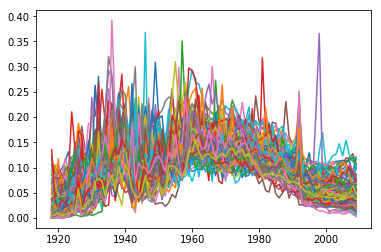

In [984]:
nn = next(n)
cl = df_copy.clusters.value_counts().index[nn]
print (cl)
ax = plt.gca()

for i in df_copy[df_copy.clusters == cl].index:
    plt.plot(range(1918, 2010), list(data.iloc[i]))
plt.show()

In [993]:
df_copy[df_copy.clusters == cl].head(20)

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2005,2006,2007,2008,2009,summa,max_diff,rel_summa,rel_max_diff,clusters
1099,кратко,0.092025,0.085799,0.089371,0.097223,0.111785,0.131273,0.104923,0.109911,0.114074,...,0.096869,0.102723,0.097903,0.090489,0.096815,845591.0,5261.0,12.131092,0.057933,256
1104,изоляция,0.002340,0.011172,0.018991,0.031439,0.041628,0.051241,0.058834,0.066663,0.095928,...,0.090623,0.097713,0.092572,0.094740,0.084723,869895.0,4888.0,12.055060,0.105830,256
1115,комнатный,0.092025,0.064796,0.031652,0.060764,0.028011,0.037947,0.049616,0.052338,0.073822,...,0.050167,0.054980,0.063550,0.053861,0.043244,900929.0,8568.0,11.872126,0.092522,256
1133,конус,0.018327,0.033962,0.058464,0.030646,0.036051,0.039884,0.041992,0.048115,0.100052,...,0.052106,0.055921,0.061018,0.042594,0.037931,867442.0,6573.0,11.673177,0.070920,256
1165,азотный,0.009358,0.025919,0.043196,0.026155,0.015821,0.043758,0.051551,0.061612,0.094278,...,0.020219,0.019575,0.018582,0.016976,0.015172,789701.0,7403.0,11.263080,0.161777,256
1176,изгиб,0.055371,0.041559,0.061070,0.064991,0.055374,0.048424,0.070442,0.082089,0.136510,...,0.041334,0.040830,0.048603,0.045411,0.048237,779717.0,4931.0,11.110196,0.094599,256
1178,геол,0.015987,0.031728,0.013033,0.007662,0.038256,0.015232,0.063045,0.122674,0.091804,...,0.021225,0.016943,0.027385,0.016208,0.017701,827348.0,14715.0,11.099458,0.161774,256
1185,драматургия,0.012478,0.014300,0.009310,0.003435,0.022175,0.031167,0.049503,0.019650,0.025652,...,0.110650,0.107997,0.089053,0.078736,0.083278,826258.0,5967.0,11.043748,0.149021,256
1190,измеряться,0.054201,0.071053,0.073359,0.032760,0.050186,0.051065,0.067597,0.065285,0.115476,...,0.039102,0.039029,0.040102,0.038523,0.036571,805550.0,6017.0,10.953423,0.065537,256
1193,износ,0.001170,0.004469,0.029418,0.003435,0.006743,0.008980,0.008990,0.008631,0.132715,...,0.072087,0.072389,0.065083,0.066587,0.081238,889656.0,17194.0,10.945690,0.309140,256


# Посмотреть с какими словами слово в одном кластере

изотоп


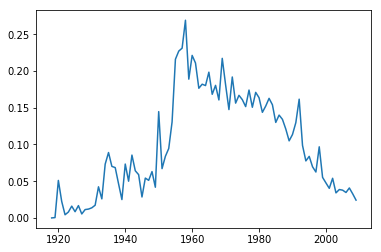

In [1015]:
# тут нужно написать свое слово
word = 'изотоп'
idx = int(df[df.unigram == word].index[0])
plt.plot(range(1918, 2010), list(data.iloc[idx]))
print (word)
plt.show()

In [1016]:
clstr = df_copy.iloc[idx]['clusters']
print ('Номер кластера - {}, всего в кластере слов: {}'.format(clstr, df_copy[df_copy.clusters == clstr].shape[0]))
df_copy[df_copy.clusters == clstr].head(30) #показать первые 30

Номер кластера - 256, всего в кластере слов: 89


,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2005,2006,2007,2008,2009,summa,max_diff,rel_summa,rel_max_diff,clusters
1099,кратко,0.092025,0.085799,0.089371,0.097223,0.111785,0.131273,0.104923,0.109911,0.114074,...,0.096869,0.102723,0.097903,0.090489,0.096815,845591.0,5261.0,12.131092,0.057933,256
1104,изоляция,0.002340,0.011172,0.018991,0.031439,0.041628,0.051241,0.058834,0.066663,0.095928,...,0.090623,0.097713,0.092572,0.094740,0.084723,869895.0,4888.0,12.055060,0.105830,256
1115,комнатный,0.092025,0.064796,0.031652,0.060764,0.028011,0.037947,0.049616,0.052338,0.073822,...,0.050167,0.054980,0.063550,0.053861,0.043244,900929.0,8568.0,11.872126,0.092522,256
1133,конус,0.018327,0.033962,0.058464,0.030646,0.036051,0.039884,0.041992,0.048115,0.100052,...,0.052106,0.055921,0.061018,0.042594,0.037931,867442.0,6573.0,11.673177,0.070920,256
1165,азотный,0.009358,0.025919,0.043196,0.026155,0.015821,0.043758,0.051551,0.061612,0.094278,...,0.020219,0.019575,0.018582,0.016976,0.015172,789701.0,7403.0,11.263080,0.161777,256
1176,изгиб,0.055371,0.041559,0.061070,0.064991,0.055374,0.048424,0.070442,0.082089,0.136510,...,0.041334,0.040830,0.048603,0.045411,0.048237,779717.0,4931.0,11.110196,0.094599,256
1178,геол,0.015987,0.031728,0.013033,0.007662,0.038256,0.015232,0.063045,0.122674,0.091804,...,0.021225,0.016943,0.027385,0.016208,0.017701,827348.0,14715.0,11.099458,0.161774,256
1185,драматургия,0.012478,0.014300,0.009310,0.003435,0.022175,0.031167,0.049503,0.019650,0.025652,...,0.110650,0.107997,0.089053,0.078736,0.083278,826258.0,5967.0,11.043748,0.149021,256
1190,измеряться,0.054201,0.071053,0.073359,0.032760,0.050186,0.051065,0.067597,0.065285,0.115476,...,0.039102,0.039029,0.040102,0.038523,0.036571,805550.0,6017.0,10.953423,0.065537,256
1193,износ,0.001170,0.004469,0.029418,0.003435,0.006743,0.008980,0.008990,0.008631,0.132715,...,0.072087,0.072389,0.065083,0.066587,0.081238,889656.0,17194.0,10.945690,0.309140,256


# Взять только часть лет (например, 1920-1962)

In [2]:
df_copy = pd.read_csv('three_hundred_clusters.csv')

In [5]:
df_copy.head()

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2005,2006,2007,2008,2009,summa,max_diff,rel_summa,rel_max_diff,clusters
0,как,47.047624,50.485318,51.249606,51.324196,51.174535,50.690452,43.827938,46.661967,43.969615,...,42.500982,43.109769,42.680030,43.139763,42.728090,247411509.0,1358855.0,3818.433795,6.862513,9
1,для,39.036406,39.355981,36.372634,35.476594,34.023851,33.740838,37.896171,34.679782,37.146528,...,30.345128,30.883207,30.777979,29.839784,29.342707,224808916.0,949912.0,3299.256128,4.312338,10
2,который,57.506854,58.760933,48.914409,49.913671,45.856711,43.924041,41.801180,40.520746,37.656026,...,35.102393,35.800814,35.790432,35.352373,35.406858,205673046.0,1095121.0,3207.133563,9.846525,1
3,или,24.556165,25.115971,23.030987,20.249053,19.808623,20.124200,23.478078,20.004466,20.104439,...,17.760823,19.057366,18.700423,19.169327,20.437974,105426662.0,535503.0,1631.491025,5.029258,17
4,год,18.330851,15.306693,15.909211,14.357555,14.889439,15.255392,17.956783,17.783390,16.347415,...,20.784922,21.194543,21.730999,21.910810,21.658590,100948572.0,692196.0,1454.257712,3.444267,21


In [7]:
start_year = 1918
end_year = 2009
start = df_copy.columns.get_loc(str(start_year))
end = df_copy.columns.get_loc(str(end_year)) + 1

In [1613]:
messages = 150000
data = df.iloc[:messages, start:end].fillna(0)

In [1614]:
clust_labels = cluster(data, k=150)

In [1615]:
df_copy = df[:messages]

In [1616]:
df_copy['clusters'] = clust_labels

/home/marina/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1617]:
df_copy.clusters.value_counts()[5:40]

141    532
28     387
67     288
140    255
129    162
34     148
15     119
63      94
115     93
97      83
11      73
17      60
125     51
76      50
30      43
85      35
75      27
50      24
143     23
44      21
122     21
107     20
100     19
113     19
147     18
37      17
43      16
8       14
53      13
87      11
110     11
83      11
6       10
38       9
108      9
Name: clusters, dtype: int64

In [1191]:
# 1920-1962

#63, 28, 139,251 - вторая мировая
#17, 279 - обычные слова, которые часто использовались по время второй мировой
#142 - война и международная деятельность
#268, 194, 55, 264 - индустриализация
#13 - отголоски гражданской войны
#144 - слова в постоянной растущей динамике
#276, 258 - наука после войны
#286 - старая орфография
#96, 183 - наука (постепенный рост)
#277 - какие то сокращения, война
#84 - падение популярности
#219 - дипломатия, становление ссср
#
#
#
#

In [8]:
n = iter(range(6, 200))

In [19]:
# 1925 - 1960
#53, 198, 201, 250 - война

df_copy.iloc[i, 1:3]

1918    0.0245659
1919    0.0156405
Name: 2150, dtype: object

250


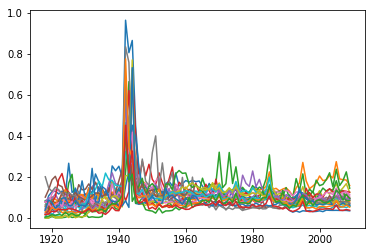

In [58]:
nn = next(n)
cl = df_copy.clusters.value_counts().index[nn]
print (cl)
ax = plt.gca()

for i in df_copy[df_copy.clusters == cl].index:
    plt.plot(range(start_year, end_year + 1), list(df_copy.iloc[i, start:end]))
plt.show()

In [59]:
df_copy[df_copy.clusters == cl].iloc[:,:end].head(35)

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
999,агитатор,0.053811,0.107696,0.127726,0.130247,0.116713,0.130657,0.112433,0.266467,0.124302,...,0.034645,0.030681,0.038168,0.037027,0.036801,0.037017,0.036559,0.036606,0.036641,0.034489
1020,госпиталь,0.057320,0.068818,0.102777,0.090618,0.080272,0.116041,0.139062,0.087047,0.058151,...,0.204414,0.182044,0.184661,0.207432,0.194735,0.274118,0.190133,0.186259,0.184691,0.158163
1097,гвардейский,0.084226,0.040218,0.100170,0.060500,0.089999,0.093942,0.062931,0.169595,0.212724,...,0.157377,0.163349,0.186767,0.220131,0.150943,0.237366,0.157663,0.181602,0.224430,0.144797
1122,крылов,0.077207,0.078649,0.046920,0.076088,0.074826,0.094999,0.061793,0.077314,0.074070,...,0.087605,0.098000,0.077997,0.099624,0.079190,0.088757,0.110001,0.096242,0.115659,0.084638
1124,годовщина,0.078767,0.098312,0.092723,0.116773,0.083644,0.081616,0.119034,0.108901,0.087102,...,0.093922,0.093675,0.088740,0.090775,0.095439,0.107742,0.095739,0.089959,0.091539,0.093287
1130,драться,0.101383,0.137636,0.185445,0.202900,0.160286,0.152051,0.104467,0.123868,0.105578,...,0.096758,0.088396,0.093165,0.094686,0.095466,0.105538,0.094990,0.102664,0.113175,0.098217
1163,доноситься,0.077987,0.069265,0.118789,0.138965,0.132015,0.115777,0.083415,0.090353,0.075967,...,0.100435,0.099549,0.095837,0.100565,0.103465,0.111354,0.104950,0.112408,0.125748,0.106356
1264,кутузов,0.063949,0.018322,0.081924,0.036459,0.025806,0.061190,0.025605,0.068958,0.032416,...,0.094459,0.084914,0.100662,0.092545,0.075280,0.107138,0.073968,0.105847,0.084062,0.093712
1272,аэродром,0.001170,0.002234,0.016757,0.004755,0.005965,0.006251,0.042447,0.011478,0.021941,...,0.133076,0.101418,0.133393,0.115664,0.140025,0.164566,0.129100,0.146308,0.166972,0.124248
1299,героизм,0.035874,0.067924,0.065167,0.061557,0.059264,0.071403,0.052347,0.067948,0.044871,...,0.069951,0.062389,0.067689,0.066327,0.064816,0.094445,0.067156,0.062760,0.066702,0.057630


In [47]:
df_copy.to_csv('300_80k_20-60.csv', index=False)

KeyboardInterrupt: 

In [1066]:
len(list(df_copy.iloc[idx])), len(range(1920, 1963))

(98, 43)

колонка


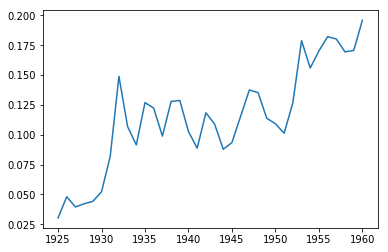

In [1374]:
# тут нужно написать свое слово
word = 'колонка'
idx = int(df_copy[df_copy.unigram == word].index[0])
plt.plot(range(start_year, end_year + 1), list(df_copy.iloc[idx, start:end]))
print (word)
plt.show()

In [1375]:
clstr = df_copy.iloc[idx]['clusters']
print ('Номер кластера - {}, всего в кластере слов: {}'.format(clstr, df_copy[df_copy.clusters == clstr].shape[0]))
df_copy[df_copy.clusters == clstr].head(30) #показать первые 30

Номер кластера - 212, всего в кластере слов: 55


,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2005,2006,2007,2008,2009,summa,max_diff,rel_summa,rel_max_diff,clusters
451,ядерный,0.000000,0.016981,0.125865,0.010832,0.033976,0.010653,0.144866,0.036637,0.034890,...,0.497859,0.548039,0.500152,0.587155,0.497184,3616025.0,25566.0,36.092449,0.224088,212
566,диапазон,0.001170,0.004469,0.005958,0.005020,0.009467,0.011798,0.020484,0.009825,0.105496,...,0.258344,0.237562,0.238776,0.224661,0.157079,2725389.0,24116.0,27.401197,0.258700,212
599,космический,0.031195,0.040665,0.067028,0.042799,0.133831,0.104332,0.118123,0.055185,0.047510,...,0.375148,0.368251,0.364168,0.377000,0.374615,2402515.0,17563.0,25.593744,0.236735,212
733,авт,0.012088,0.139871,0.016012,0.018229,0.011801,0.037330,0.036302,0.037831,0.052377,...,0.154635,0.137976,0.120015,0.136297,0.139952,1805569.0,27889.0,19.833425,0.254396,212
736,интегральный,0.009358,0.009831,0.025322,0.010304,0.030864,0.020426,0.059175,0.033790,0.053284,...,0.133968,0.137835,0.141535,0.121087,0.089526,1833576.0,17018.0,19.618829,0.182023,212
763,автоматизация,0.000000,0.000000,0.006330,0.000264,0.007911,0.008276,0.021736,0.043615,0.059388,...,0.065247,0.067693,0.065965,0.066587,0.056652,1894216.0,27850.0,18.739065,0.285696,212
846,граничный,0.013648,0.007597,0.004841,0.010568,0.005317,0.007660,0.007283,0.006611,0.061450,...,0.100179,0.095375,0.109389,0.078531,0.033086,1571576.0,19025.0,16.449058,0.207480,212
869,исследоваться,0.015207,0.015194,0.018991,0.013474,0.029049,0.030463,0.039830,0.042881,0.081658,...,0.085493,0.075466,0.073479,0.062605,0.055994,1464188.0,15370.0,15.979228,0.158098,212
876,диффузия,0.001950,0.011172,0.014523,0.008718,0.013487,0.011446,0.012063,0.022037,0.064007,...,0.047442,0.050891,0.060333,0.037550,0.028305,1418758.0,17774.0,15.859321,0.195090,212
884,аналогично,0.013258,0.022344,0.032397,0.025098,0.046426,0.040060,0.053941,0.048482,0.109290,...,0.103992,0.098776,0.100051,0.085752,0.064302,1333275.0,11268.0,15.660135,0.121271,212


кофе


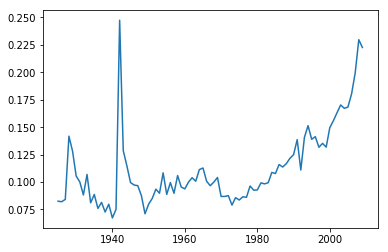

In [1404]:
# тут нужно написать свое слово
word = 'кофе'
idx = int(df[df.unigram == word].index[0])
plt.plot(range(1925, 2010), list(df.iloc[idx, start:-4]))
print (word)
plt.show()

In [1401]:
df.iloc[idx, :]

unigram            колонка
1918             0.0171571
1919             0.0120655
1920             0.0558571
1921              0.015059
1922             0.0228238
1923             0.0187533
1924             0.0324327
1925             0.0303012
1926             0.0480052
1927             0.0394862
1928             0.0421463
1929             0.0441838
1930             0.0521531
1931              0.081808
1932              0.148922
1933              0.106799
1934             0.0914534
1935              0.126939
1936              0.122242
1937             0.0988151
1938              0.127831
1939               0.12869
1940              0.102627
1941             0.0887169
1942              0.118345
1943              0.109007
1944             0.0878094
1945              0.093456
1946              0.115562
                   ...    
1984              0.194953
1985              0.179804
1986              0.203933
1987              0.196189
1988              0.175281
1989              0.160935
1